In [59]:
import torch
from torch import zeros, ones, eye, float32, float64
from torch.distributions import Normal, MultivariateNormal, Uniform

import matplotlib.pyplot as plt
import matplotlib as mpl

In [60]:
prior1 = Normal(zeros(1), ones(1))

In [61]:
theta = torch.linspace(-3, 3, 500)

In [151]:
prior1_probs = prior1.log_prob(theta).exp()
prior2_probs = prior1.log_prob(theta).exp()
prior2_probs[theta < -0.4] = 0.0
prior2_probs[theta > 1.9] = 0.0

In [155]:
likelihood_dist1 = Normal(1.1, 0.2*ones(1))
likelihood_dist2 = Normal(0.4, 0.2*ones(1))

In [156]:
likelihood_probs = likelihood_dist1.log_prob(theta).exp() + likelihood_dist2.log_prob(theta).exp()

### Prior

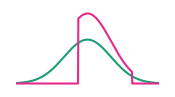

In [157]:
with mpl.rc_context(fname="../../../paper/.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(2.0, 1))
    _ = ax.plot(theta.numpy(), prior1_probs.numpy() / prior1_probs.sum().numpy(), c="#1b9e77")
    _ = ax.plot(theta.numpy(), prior2_probs.numpy() / prior2_probs.sum().numpy(), c="#e7298a")
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.savefig("../svg/panel_a.svg")

### Likelihood

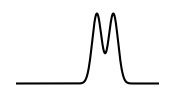

In [158]:
with mpl.rc_context(fname="../../../paper/.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(2.-0, 1))
    _ = ax.plot(theta.numpy(), likelihood_probs.numpy(), c="k")
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.savefig("../svg/panel_b.svg")

### Posterior

In [159]:
posterior1 = prior1_probs * likelihood_probs
posterior2 = prior2_probs * likelihood_probs

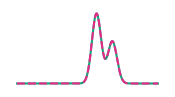

In [160]:
with mpl.rc_context(fname="../../../paper/.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(2.0, 1))
    _ = ax.plot(theta.numpy(), posterior1.numpy(), c="#1b9e77")
    _ = ax.plot(theta.numpy(), posterior2.numpy(), linestyle='--', c="#e7298a")
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.savefig("../svg/panel_c.svg")

In [161]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [163]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("15.7cm", "2.2cm",
    Panel(
          SVG("../svg/panel_a.svg").scale(svg_scale).move(0, 0),
    ).move(0, 0),
    
    Panel(
          SVG("../svg/panel_b.svg").scale(svg_scale).move(0, 0),
    ).move(170, 0),
           
    Panel(
          SVG("../svg/panel_c.svg").scale(svg_scale).move(0, 0),
    ).move(340, 0),
)

f.save("../fig/fignew.svg")
svg('../fig/fignew.svg')